name: slovenščina code: sl       confidence:  99.0 read bytes:   651
name: slovenščina code: sl       confidence:  77.0 read bytes:   410
name: albanščina  code: sq       confidence:  22.0 read bytes:   209
name: slovenščina code: sl       confidence:  99.0 read bytes:   457
name: slovenščina code: sl       confidence:  99.0 read bytes:   626
name: slovenščina code: sl       confidence:  99.0 read bytes:   544
name: slovenščina code: sl       confidence:  99.0 read bytes:   567
name: slovenščina code: sl       confidence:  99.0 read bytes:   624
name: slovenščina code: sl       confidence:  82.0 read bytes:   560
name: slovenščina code: sl       confidence:  71.0 read bytes:   458
name: italijanščinacode: it       confidence:  28.0 read bytes:   395
name: slovenščina code: sl       confidence:  99.0 read bytes:   640
name: slovenščina code: sl       confidence:  99.0 read bytes:   557
name: slovenščina code: sl       confidence:  94.0 read bytes:   440
name: slovenščina code: sl       

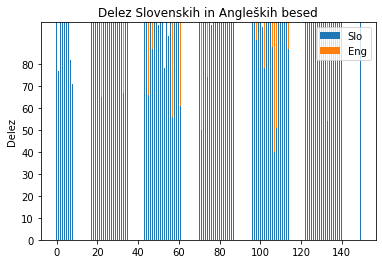

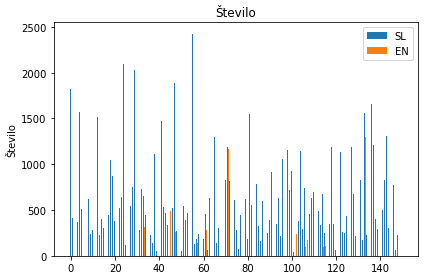

In [2]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import polyglot
import os
from polyglot.text import Text, Word
from polyglot.mapping import Embedding
from polyglot.detect import Detector

import nltk
from nltk.corpus import stopwords
import numpy as np
import random
from matplotlib.ticker import NullFormatter






__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'scripts\\data\\dogodki_strippedOnlySlov.csv')
df = pd.read_csv(input_file, header = 0)
original_headers = list(df.columns.values)
data_opis = df['opis'].astype('U')


_SAMPLE_SIZE = 150
sampled_list = random.sample(list(data_opis), _SAMPLE_SIZE)

delezByCountry = []

for row in sampled_list:
    try:
        detector = Detector(str(row), quiet=True)
        dog = {}
        for language in detector.languages:
            if language.code != 'un':
                print(language)
                dist = {
                "code": language.code,
                "confidence": language.confidence,
                "count": len(str(row)) * (language.confidence / 100)
                }
                dog[language.code] = dist
        delezByCountry.append(dog)
    except:
        print('Preskočen.')


N = len(delezByCountry)
slDelez = [0] * N
enDelez = [0] * N

slStevilo = [0] * N
enStevilo = [0] * N

for i in range(len(delezByCountry)):
    if('sl' in delezByCountry[i]):
        slDelez[i] = delezByCountry[i]['sl']['confidence']
        slStevilo[i] = delezByCountry[i]['sl']['count']
    if('en' in delezByCountry[i]):
        enDelez[i] = delezByCountry[i]['en']['confidence']
        enStevilo[i] = delezByCountry[i]['en']['count']

    
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, slDelez, width)
p2 = plt.bar(ind, enDelez, width,
             bottom=slDelez)

plt.ylabel('Delez')
plt.title('Delez Slovenskih in Angleških besed')
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Slo', 'Eng'))

plt.show()


x = np.arange(N)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, slStevilo, width, label='SL')
rects2 = ax.bar(x + width/2, enStevilo, width, label='EN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Število')
ax.set_title('Število')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()


